# This notebook is used to visualy inspect the quality of the ground truths and the proposed regions of interest RoI for the masked R-CNN

In [ ]:
dataset_filepath = "/net/vdesk/data2/penchev/project_data/full-dataset/"
images_train_filepath = "train/images/"
proposals_train_filepath = "train/proposals/"

proposals = [
    "LoTSS_GRG_0000000025_RA27.6127308_DEC20.19936183865.npz",
    "LoTSS_GRG_0000000026_rotated_angle45_RA27.6127308_DEC20.19936183865.npz",
    "LoTSS_GRG_0000000027_rotated_angle90_RA27.6127308_DEC20.19936183865.npz",
    "LoTSS_GRG_0000000028_rotated_angle135_RA27.6127308_DEC20.19936183865.npz",
    "LoTSS_GRG_0000000029_rotated_angle180_RA27.6127308_DEC20.19936183865.npz",
    "LoTSS_GRG_0000000030_rotated_angle225_RA27.6127308_DEC20.19936183865.npz",
    "LoTSS_GRG_0000000031_rotated_angle270_RA27.6127308_DEC20.19936183865.npz",
    "LoTSS_GRG_0000000032_rotated_angle315_RA27.6127308_DEC20.19936183865.npz",
]

images = []
for prop in proposals:
    images.append(prop.replace(".npz", ".png"))

In [25]:
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import numpy as np
import os

def plot_image_with_boxes_proposals(image: str, proposals: str):
    """
    Plot an image with bounding boxes overlaid.
    
    :param image_path: Path to the image file
    :param boxes: Array of bounding boxes in the format [x_min, y_min, x_max, y_max]
    """
    image_path = os.path.join(dataset_filepath, images_train_filepath, image)
    proposals_path = os.path.join(dataset_filepath, proposals_train_filepath, proposals)

    # Get the data for the plotting of the images
    boxes = np.load(proposals_path)['boxes']
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 12))

    img = plt.imread(image_path)
    ax[0].imshow(img)
    ax[0].set_title("Image")

    ax[1].imshow(img)
    print(f"Plotting {len(boxes)} boxes on image {image}")
    for box in boxes:
        x_min, y_min, x_max, y_max = box
        width = x_max - x_min
        height = y_max - y_min
        rect = plt.Rectangle((x_min, y_min), width, height, edgecolor='red', facecolor='none', linewidth=2)
        ax[1].add_patch(rect)
    ax[1].set_title("Image with Bounding Boxes")
    plt.show()

def plot_image_with_gt_boxes_and_segmentation(image: str):
    image_path = os.path.join(dataset_filepath, images_train_filepath, image)
    image_id = int(image.split("GRG_")[1].split("_")[0].lstrip("0"))
    annotation_json_path = os.path.join(dataset_filepath, "train", "annotations.json")

    # Load COCO annotations
    coco = COCO(annotation_json_path)
    ann_ids = coco.getAnnIds(imgIds=[image_id], iscrowd=None)
    anns = coco.loadAnns(ann_ids)
    boxes = [ann['bbox'] for ann in anns]  # COCO format: [x_min, y_min, width, height]
    boxes = [[box[0], box[1], box[0] + box[2], box[1] + box[3]] for box in boxes]  # Convert to [x_min, y_min, x_max, y_max]

    # Get segmentation masks
    segs = [ann['segmentation'] for ann in anns]

    fig, ax = plt.subplots(figsize=(8, 8))
    img = plt.imread(image_path)
    ax.imshow(img)
    print(f"Plotting {len(boxes)} GT boxes on image {image}")
    for box in boxes:
        x_min, y_min, x_max, y_max = box
        width = x_max - x_min
        height = y_max - y_min
        rect = plt.Rectangle((x_min, y_min), width, height, edgecolor='blue', facecolor='none', linewidth=2)
        ax.add_patch(rect)
    for seg in segs:
        if isinstance(seg, list):  # Polygon segmentation
            for polygon in seg:
                poly = np.array(polygon).reshape((-1, 2))
                ax.fill(poly[:, 0], poly[:, 1], alpha=0.3, color='black')
    ax.set_title("Image with GT Bounding Boxes")
    plt.show()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Plotting 1 GT boxes on image LoTSS_GRG_0000000025_RA27.6127308_DEC20.19936183865.png


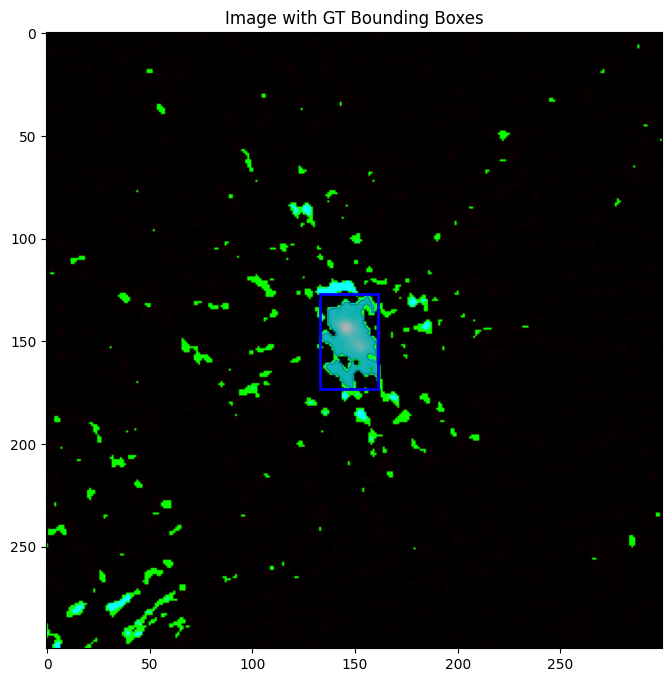

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Plotting 1 GT boxes on image LoTSS_GRG_0000000026_rotated_angle45_RA27.6127308_DEC20.19936183865.png


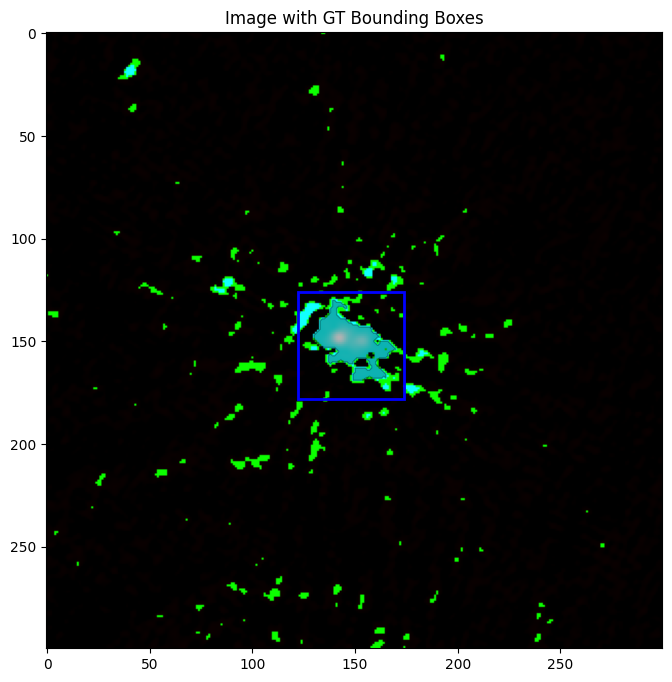

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Plotting 1 GT boxes on image LoTSS_GRG_0000000027_rotated_angle90_RA27.6127308_DEC20.19936183865.png


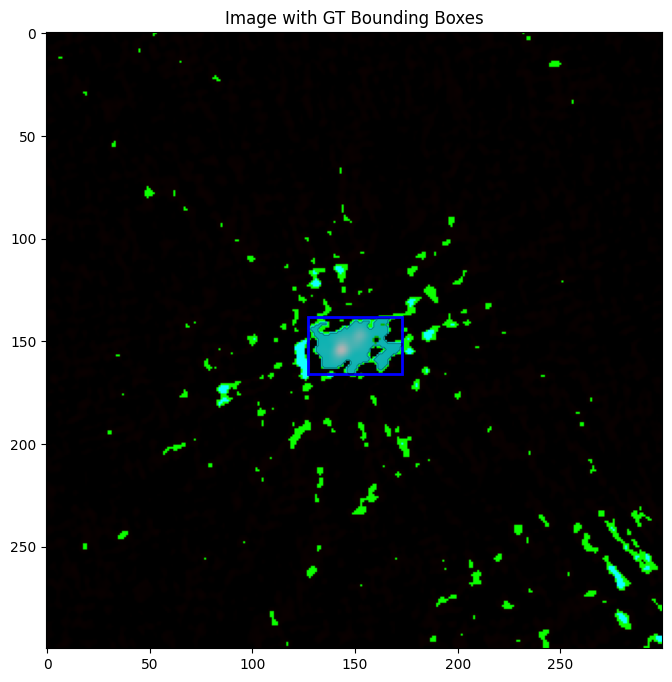

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Plotting 1 GT boxes on image LoTSS_GRG_0000000028_rotated_angle135_RA27.6127308_DEC20.19936183865.png


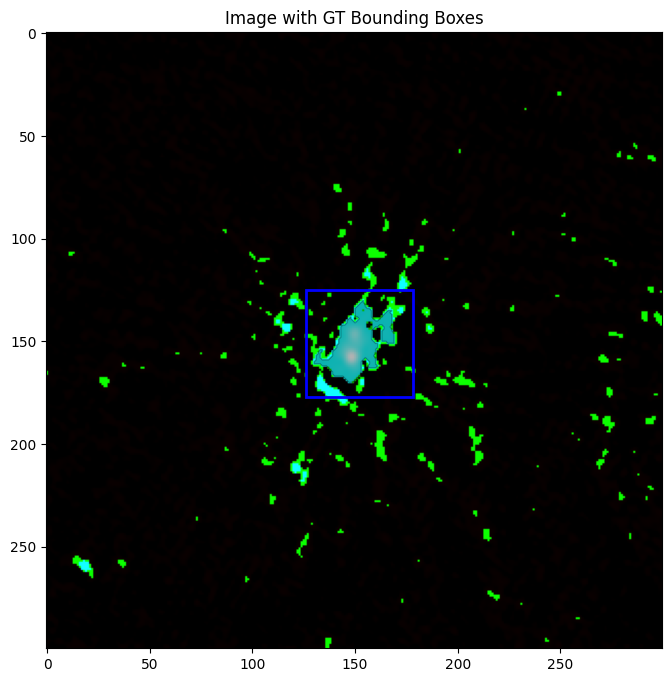

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Plotting 1 GT boxes on image LoTSS_GRG_0000000029_rotated_angle180_RA27.6127308_DEC20.19936183865.png


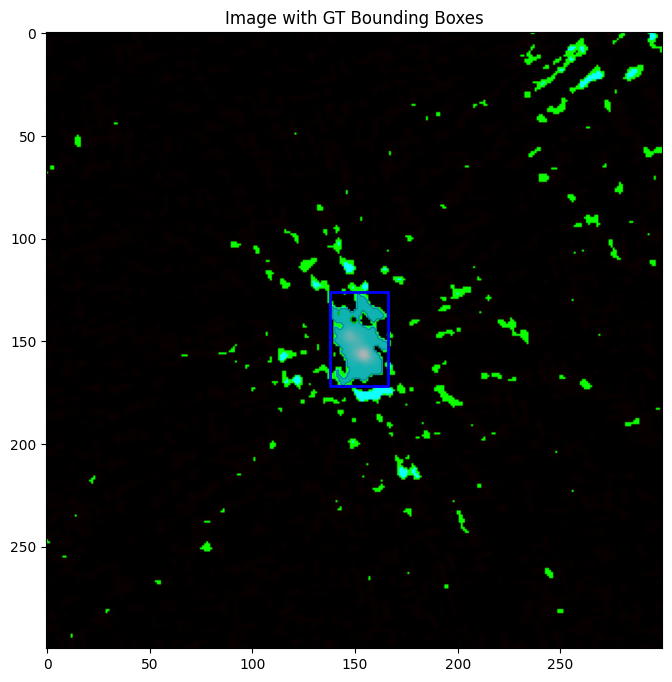

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Plotting 1 GT boxes on image LoTSS_GRG_0000000030_rotated_angle225_RA27.6127308_DEC20.19936183865.png


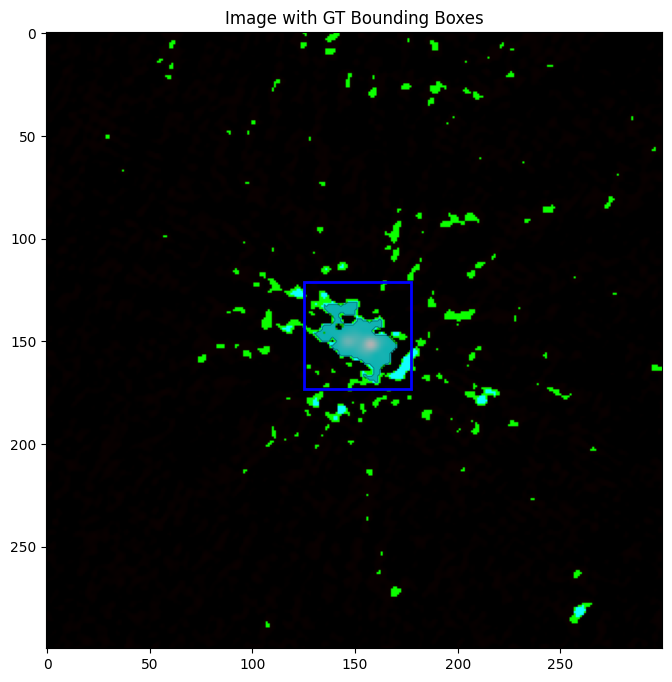

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Plotting 1 GT boxes on image LoTSS_GRG_0000000031_rotated_angle270_RA27.6127308_DEC20.19936183865.png


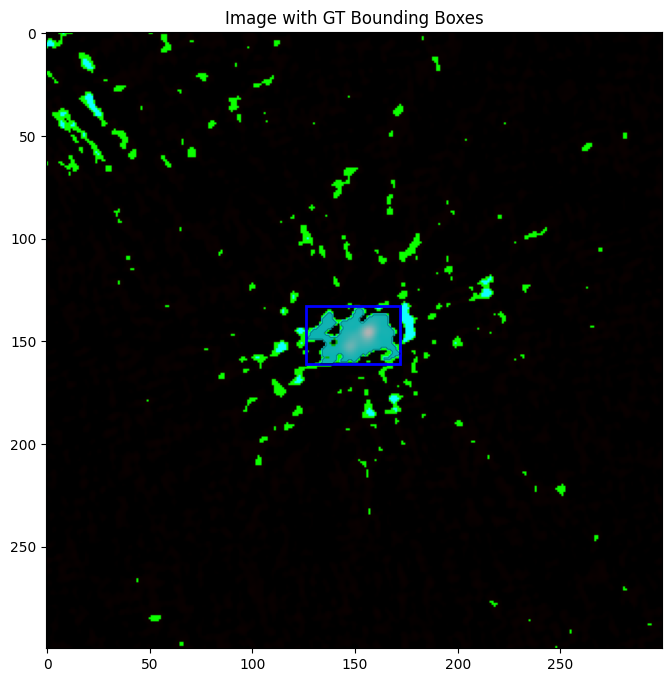

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Plotting 1 GT boxes on image LoTSS_GRG_0000000032_rotated_angle315_RA27.6127308_DEC20.19936183865.png


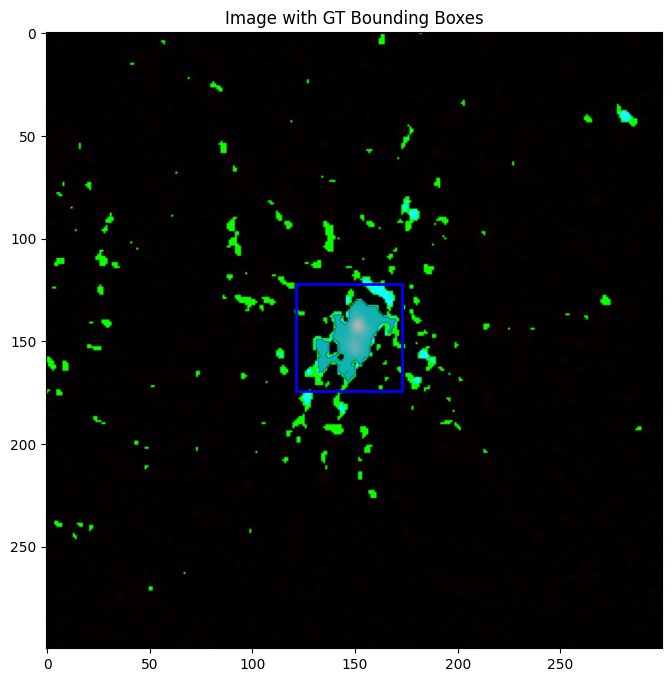

In [ ]:
for img in images:
    plot_image_with_gt_boxes_and_segmentation(img)

Plotting 511 boxes on image LoTSS_GRG_0000000025_RA27.6127308_DEC20.19936183865.png


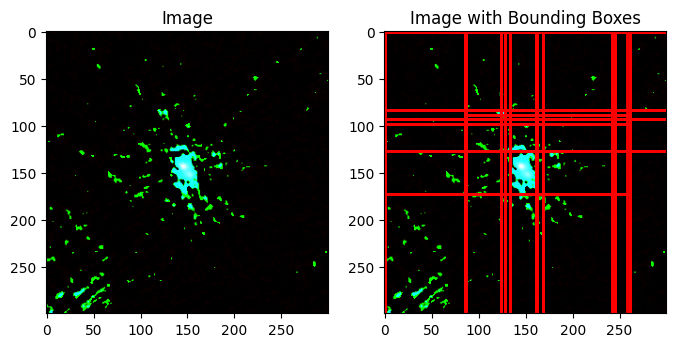

Plotting 511 boxes on image LoTSS_GRG_0000000026_rotated_angle45_RA27.6127308_DEC20.19936183865.png


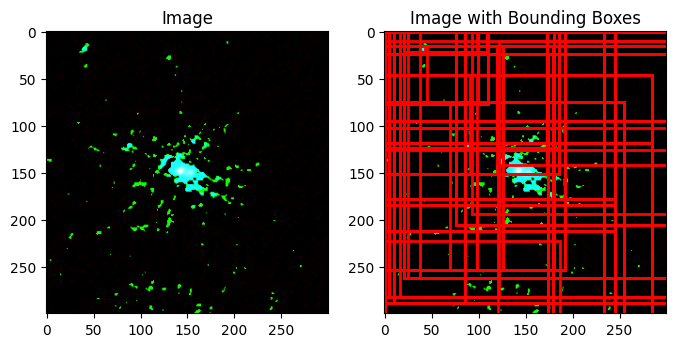

Plotting 511 boxes on image LoTSS_GRG_0000000027_rotated_angle90_RA27.6127308_DEC20.19936183865.png


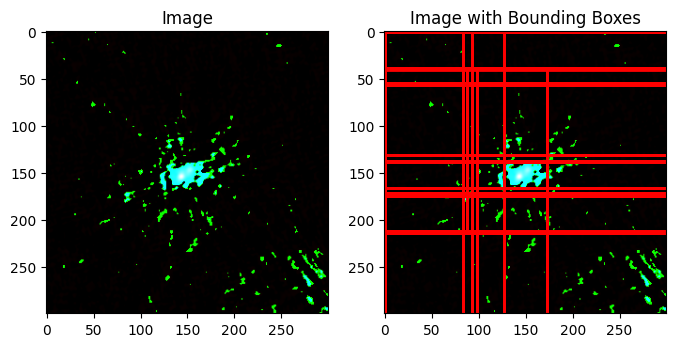

Plotting 511 boxes on image LoTSS_GRG_0000000028_rotated_angle135_RA27.6127308_DEC20.19936183865.png


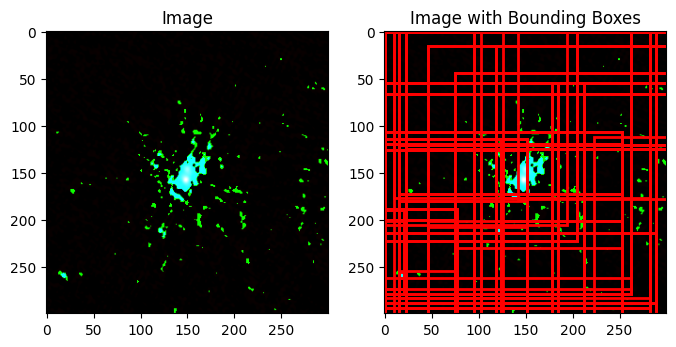

Plotting 511 boxes on image LoTSS_GRG_0000000029_rotated_angle180_RA27.6127308_DEC20.19936183865.png


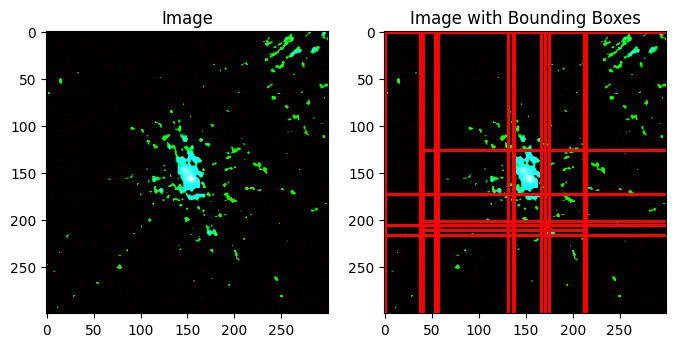

Plotting 511 boxes on image LoTSS_GRG_0000000030_rotated_angle225_RA27.6127308_DEC20.19936183865.png


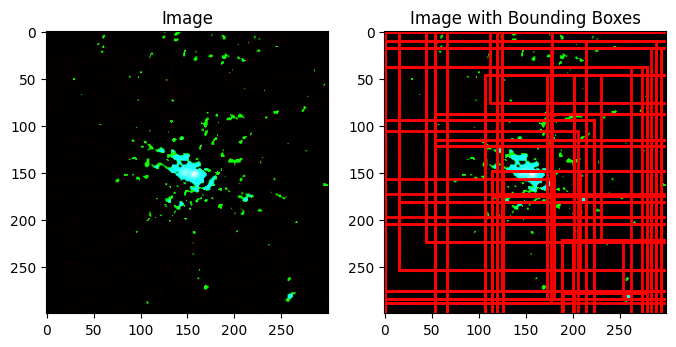

Plotting 511 boxes on image LoTSS_GRG_0000000031_rotated_angle270_RA27.6127308_DEC20.19936183865.png


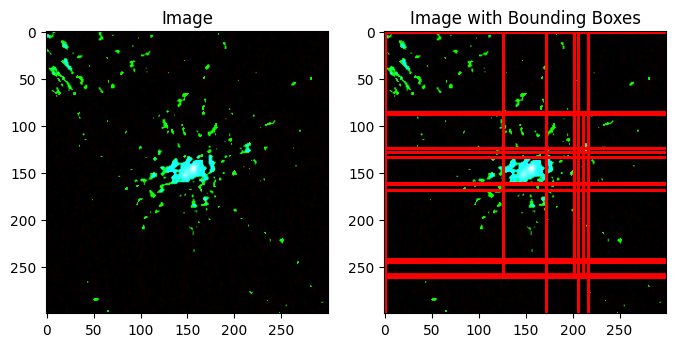

Plotting 511 boxes on image LoTSS_GRG_0000000032_rotated_angle315_RA27.6127308_DEC20.19936183865.png


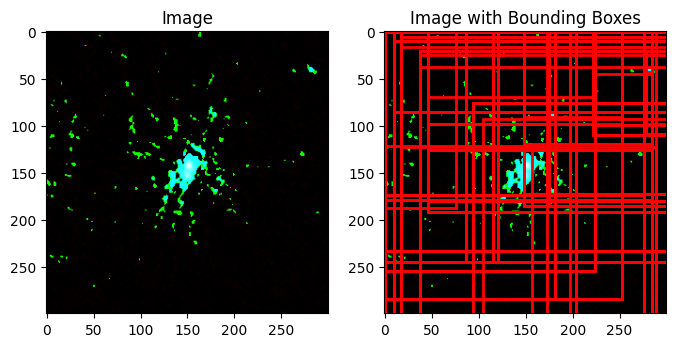

In [28]:
for img, prop in zip(images, proposals):
    plot_image_with_boxes_proposals(img, prop)